## Setup

In [16]:
import cv2
import matplotlib.pyplot as plt
import os
from scipy.ndimage import convolve as filter2
from argparse import ArgumentParser
import numpy as np
img1_path = "data/frame_0007.png"
img2_path = "data/frame_0008.png"

Derivative

In [17]:
def get_derivative(img1, img2): 
    Ix = cv2.Sobel(img1, cv2.CV_32F, 1 , 0 , ksize=3)
    Iy = cv2.Sobel(img1, cv2.CV_32F, 0 , 1 , ksize=3)
    It = img2 - img1 
    return [Ix, Iy, It]

In [18]:
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY).astype(float)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY).astype(float)

#removing noise
img1 = cv2.GaussianBlur(img1, (5,5), 0)
img2 = cv2.GaussianBlur(img2, (5,5), 0)


In [19]:
def get_derivative(img1, img2): 
    Ix = cv2.Sobel(img1, cv2.CV_32F, 1 , 0 , ksize=3)
    Iy = cv2.Sobel(img1, cv2.CV_32F, 0 , 1 , ksize=3)
    It = img2 - img1 
    return [Ix, Iy, It]
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY).astype(np.float32)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY).astype(np.float32)

#removing noise
img1 = cv2.GaussianBlur(img1, (5,5), 0)
img2 = cv2.GaussianBlur(img2, (5,5), 0)
def optical_flow_horn_schunck(img1 , img2 , alpha = 15 , delta = 1e-7):
    # finding (u,v) 
    u = np.zeros_like(img1)
    v = np.zeros_like(img2)
    Ix, Iy, It = get_derivative(img1 , img2)

    kernel_avg = np.array([[1/12, 1/6, 1/12],
                            [1/6,    0, 1/6],
                            [1/12, 1/6, 1/12]], dtype=float)
    iter_counter = 0
    while True:
        iter_counter += 1
        u_avg = filter2(u , kernel_avg)
        v_avg = filter2(v , kernel_avg)
        P = Ix * u_avg + Iy * v_avg + It
        d = alpha ** 2 + Ix ** 2 + Iy ** 2
        u_prev = u
        v_prev = v
        u = u_avg - Ix * (P/d)
        v = v_avg - Iy * (P/d)

        dif = np.linalg.norm(u - u_prev) + np.linalg.norm(v - v_prev)
        if (dif < delta or iter_counter > 300):
            break
    return [u, v]
u , v = optical_flow_horn_schunck(img1 , img2 , alpha=15, delta = 1e-8)


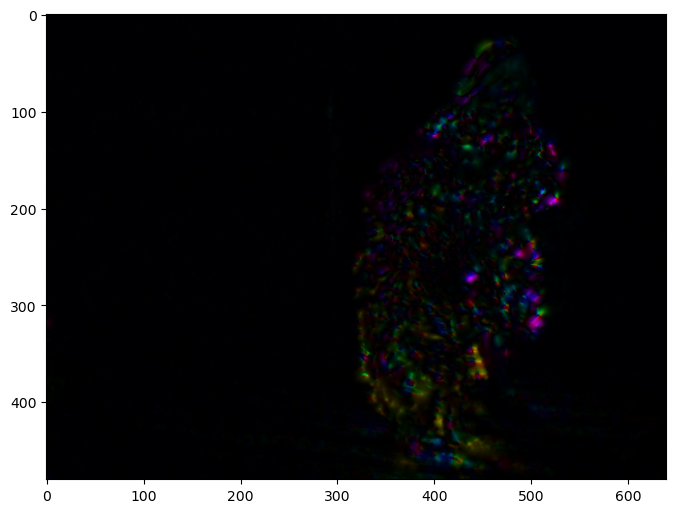

In [20]:
# Use Hue, Saturation, Value colour model 
height, weight = u.shape
hsv = np.zeros((height,weight,3), dtype=np.uint8)
hsv[..., 1] = 255

mag, ang = cv2.cartToPolar(u, v)
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.figure(figsize=(8,10))
plt.imshow(bgr)
plt.show()